In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        



In [12]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './emnist-gzip/gzip'
training_images_filepath = join(input_path, 'emnist-letters-train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'emnist-letters-train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 'emnist-letters-test-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'emnist-letters-test-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [16]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(X_train, Y_train), (X_test, Y_test) = mnist_dataloader.load_data()

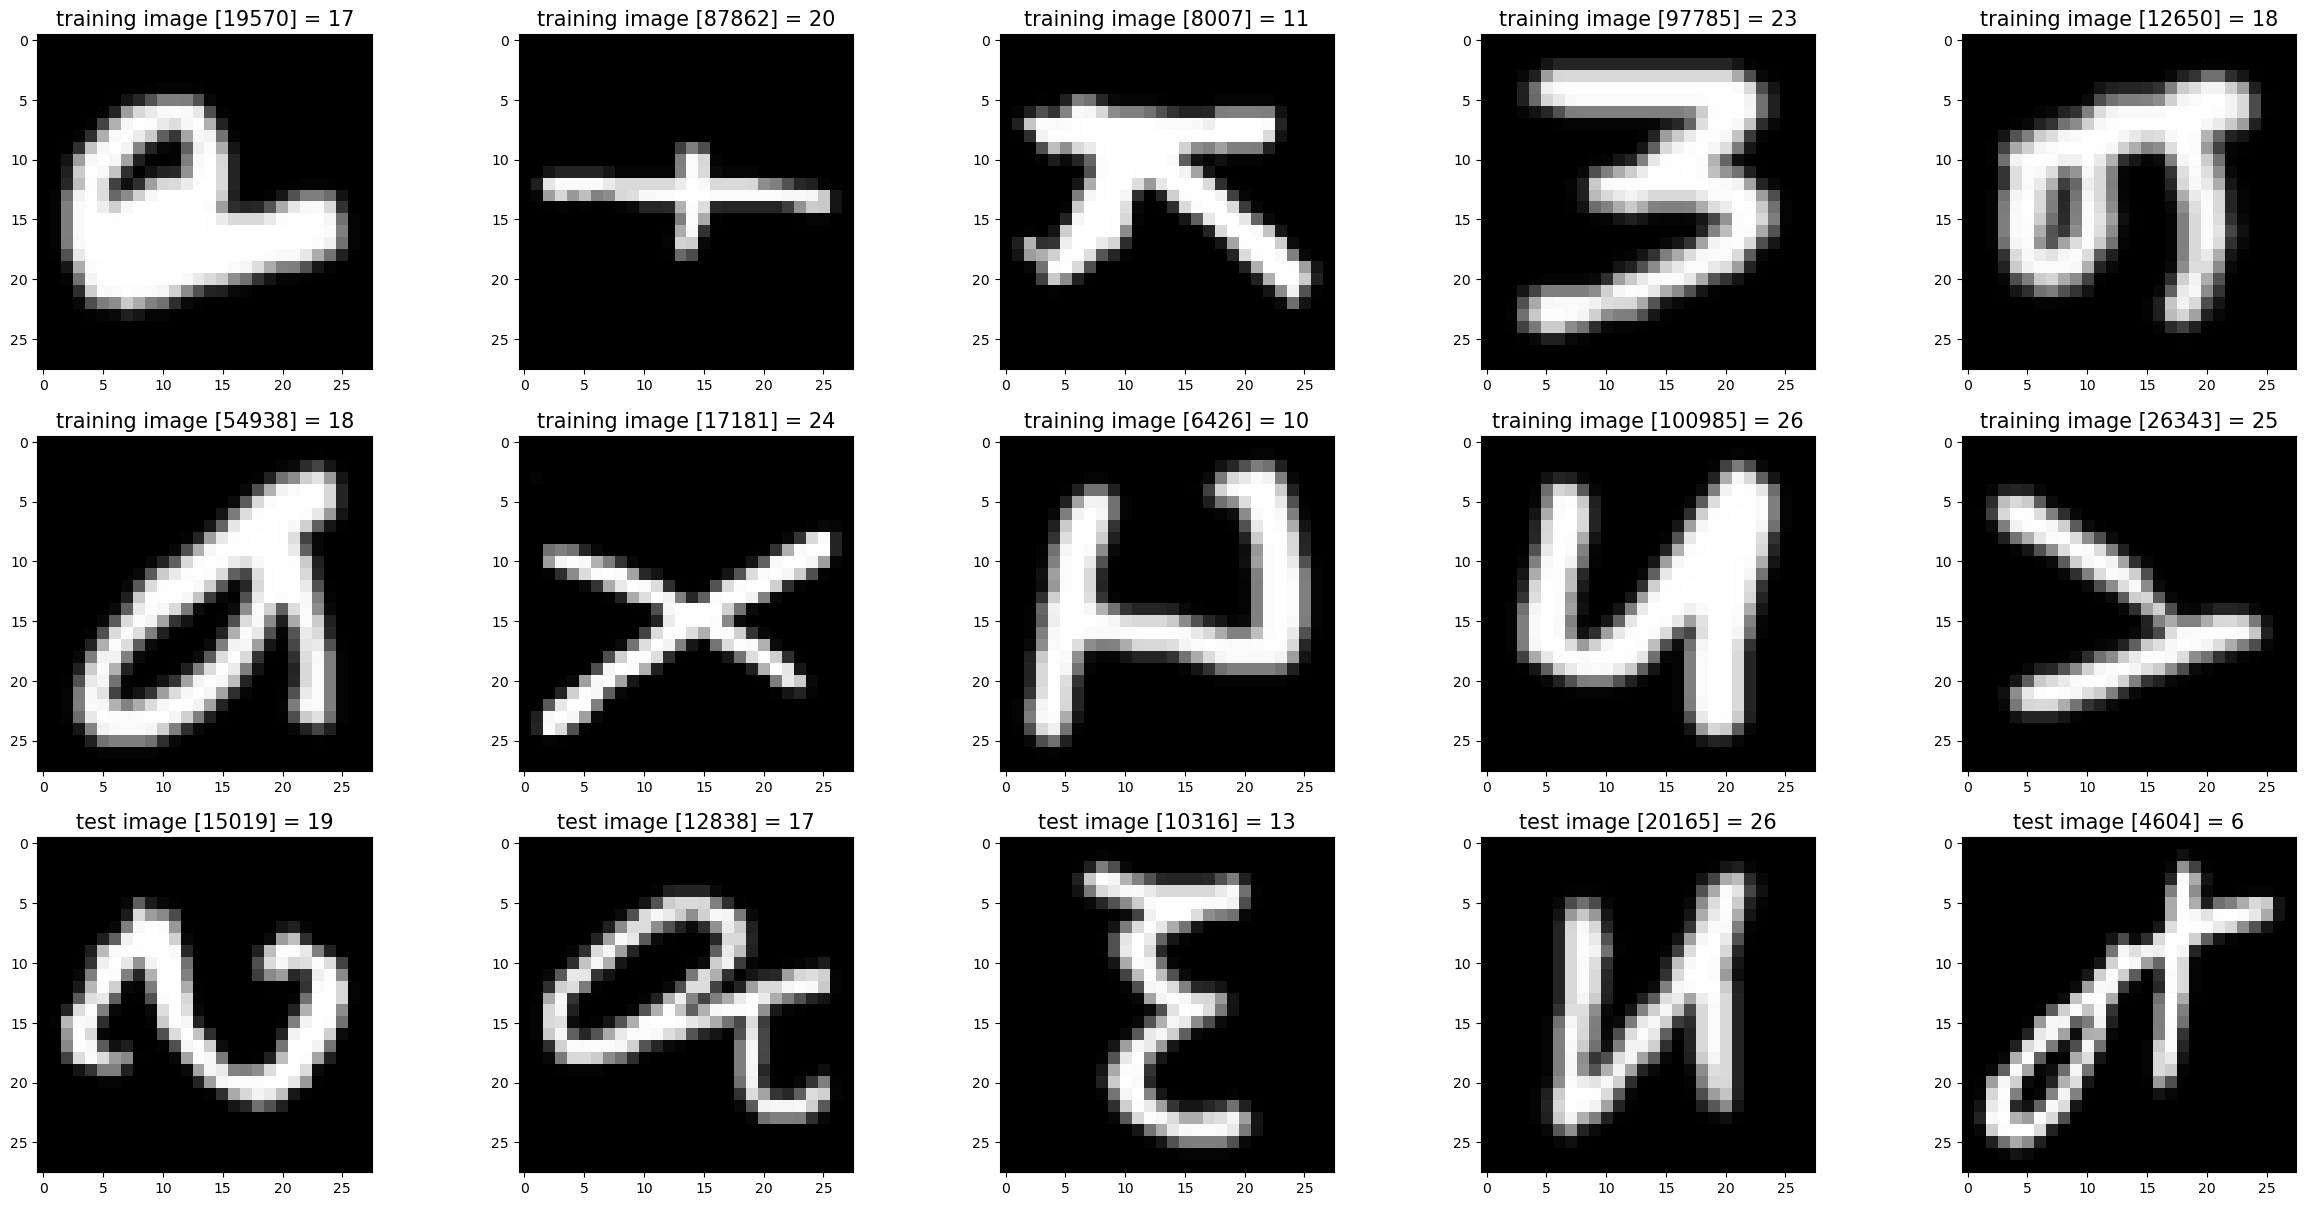

In [25]:
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 124800)
    images_2_show.append(X_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(Y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 20800)
    images_2_show.append(X_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(Y_test[r]))    

show_images(images_2_show, titles_2_show)

In [30]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((124800, 28, 28), (124800,), (20800, 28, 28), (20800,))

In [32]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [33]:
y_train= keras.utils.to_categorical(y_train-1, 26) # -1 because y_train is 1-26 not 0-25
y_test = keras.utils.to_categorical(y_test-1, 26)
y_train.shape, y_test.shape

((124800, 26), (20800, 26))

## Forward propogation ANN

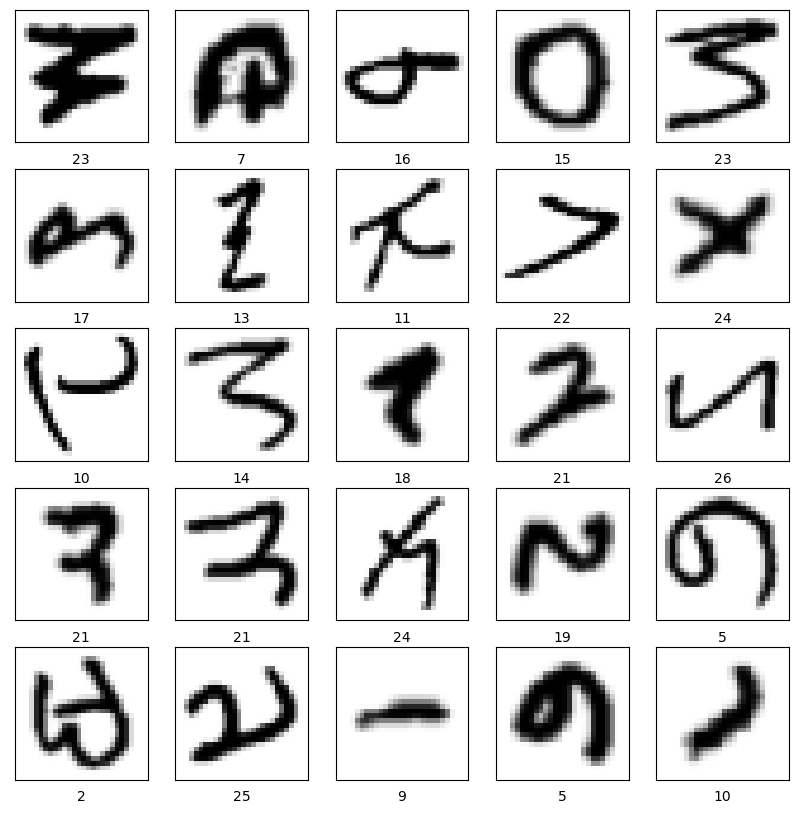

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

In [36]:
#fig_size = (10, 5)
#f = plt.figure(figsize=fig_size)

def NNlossplot(history):   
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    #axarr = fig.add_subplot(1,1,1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show();


def NNaccuracyplot(history):
    # Get training and test accuracy histories
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]
    epoch_count = range(1, len(training_accuracy) + 1)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")

    # Visualize accuracy history
    #axarr = fig.add_subplot(1,1,1)
    plt.legend(["Training Accuracy", "Test Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")
    plt.show();
    #return fig

In [37]:
#super basic mlp
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input
    keras.layers.Dense(128, activation='relu'), #hidden
    keras.layers.Dense(26) #output
])

In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/30
3900/3900 [==============================] - 48s 11ms/step - loss: 9.2345 - accuracy: 0.0818 - val_loss: 9.3076 - val_accuracy: 0.0921
Epoch 2/30
3900/3900 [==============================] - 46s 12ms/step - loss: 8.2565 - accuracy: 0.1073 - val_loss: 8.1474 - val_accuracy: 0.1122
Epoch 3/30
3900/3900 [==============================] - 42s 11ms/step - loss: 8.1828 - accuracy: 0.1105 - val_loss: 8.1474 - val_accuracy: 0.1122
Epoch 4/30
3900/3900 [==============================] - 44s 11ms/step - loss: 8.1828 - accuracy: 0.1105 - val_loss: 8.1474 - val_accuracy: 0.1122
Epoch 5/30
3900/3900 [==============================] - 44s 11ms/step - loss: 8.1828 - accuracy: 0.1105 - val_loss: 8.1474 - val_accuracy: 0.1122
Epoch 6/30
3900/3900 [==============================] - 37s 9ms/step - loss: 8.1828 - accuracy: 0.1105 - val_loss: 8.1474 - val_accuracy: 0.1122
Epoch 7/30
3900/3900 [==============================] - 43s 11ms/step - loss: 8.1828 - accuracy: 0.1105 - val_loss: 8.1474 - 

I was acually getting a decent accuracy, ~94% with this simple mlp when using integer class encoding and sparse categorical cross entropy loss function. But when I switched to one hot and categorical cross entropy the accuracy tanked, not sure why.
But the accuracy seems good below with the more complicated mlp so I'll stick with it.

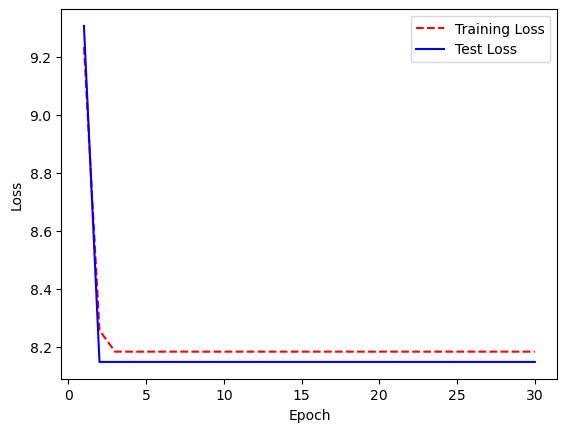

In [39]:
#figloss = 
NNlossplot(history)

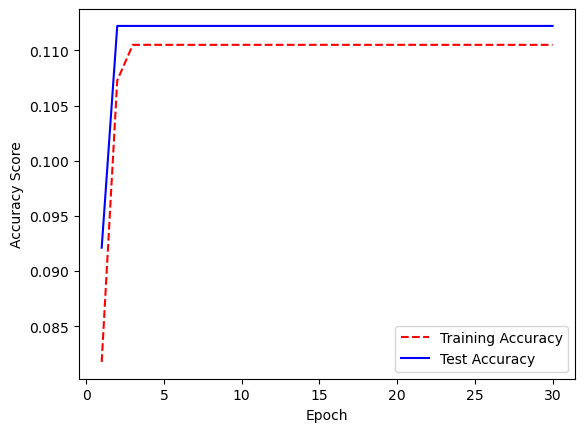

In [40]:
#figacc = 
NNaccuracyplot(history)

In [41]:
#more advanced MLP
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input 784
    keras.layers.Dense(512, activation='relu'), #hidden #1
    keras.layers.Dense(512, activation='relu'), #hidden #2
    keras.layers.Dense(512, activation='relu'), #hidden #3
    keras.layers.Dense(26, activation='softmax') #output
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/30
3900/3900 [==============================] - 151s 38ms/step - loss: 1.2053 - accuracy: 0.7453 - val_loss: 0.6267 - val_accuracy: 0.8089
Epoch 2/30
3900/3900 [==============================] - 147s 38ms/step - loss: 0.5781 - accuracy: 0.8273 - val_loss: 0.5872 - val_accuracy: 0.8261
Epoch 3/30
3900/3900 [==============================] - 87s 22ms/step - loss: 0.5027 - accuracy: 0.8509 - val_loss: 0.5108 - val_accuracy: 0.8491
Epoch 4/30
3900/3900 [==============================] - 60s 15ms/step - loss: 0.4568 - accuracy: 0.8650 - val_loss: 0.5101 - val_accuracy: 0.8596
Epoch 5/30
3900/3900 [==============================] - 56s 14ms/step - loss: 0.4320 - accuracy: 0.8727 - val_loss: 0.4861 - val_accuracy: 0.8691
Epoch 6/30
3900/3900 [==============================] - 57s 15ms/step - loss: 0.4092 - accuracy: 0.8819 - val_loss: 0.4901 - val_accuracy: 0.8674
Epoch 7/30
3900/3900 [==============================] - 57s 14ms/step - loss: 0.3903 - accuracy: 0.8870 - val_loss: 0.5044

In [ ]:
NNlossplot(history)

In [ ]:
NNaccuracyplot(history)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_test[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


In [ ]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], y_test)


In [ ]:
np.argmax(predictions_single[0])

# CNN

In [ ]:
# basic cnn
model = keras.Sequential([
    keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)), #conv
    keras.layers.MaxPool2D(pool_size=(1,1)), #pool
    # flatten output of conv
    keras.layers.Flatten(), #input
    keras.layers.Dense(128, activation='relu'), #hidden
    keras.layers.Dense(26, activation='softmax') #output
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
NNlossplot(history)

In [ ]:
NNaccuracyplot(history)

In [ ]:
# basic cnn
model = keras.Sequential([
    keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)), #conv
    keras.layers.Conv2D(50, kernel_size=(2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)), #conv
    keras.layers.MaxPool2D(pool_size=(2,2)), #pool - keep max pixel
    # flatten output of conv
    keras.layers.Flatten(), #input
    keras.layers.Dense(128, activation='relu'), #hidden
    keras.layers.Dense(26, activation='softmax') #output
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=200, epochs=30, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
NNlossplot(history)

In [ ]:
NNaccuracyplot(history)